# Quantization study

In this project, you will learn tow techniques to quantize DL models.
You will train a model to recognize hand written digits (mnist dataset), then you will quantize trained model and compare:
- Complexity
- Size
- Accuracy

## importation stuff

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load mnist dataset and split into train and test parts


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# print the number of images
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

## check the dimension of dataset images
### and plot one image

In [3]:
#print the shape of one image
print(x_train[0].shape)

(28, 28)


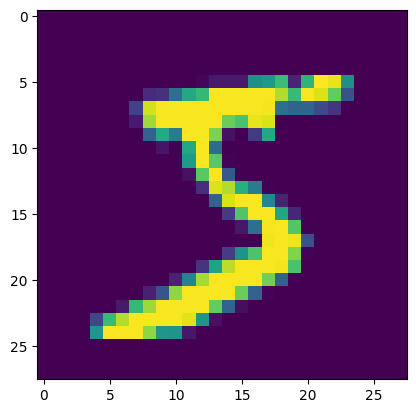

In [4]:
# plt one image
plt.imshow(x_train[0])

## Normalize Images


In [5]:
# normalize images
X_train = x_train/255
X_test = x_test/255

## Use Flatten layer and Dense (simple model)

- so flatten your data
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [6]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



C:\Users\thioy\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8739 - loss: 0.4536
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9621 - loss: 0.1324
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9749 - loss: 0.0847
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9806 - loss: 0.0644
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9843 - loss: 0.0502
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9889 - loss: 0.0383
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0329
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9932 - loss: 0.0248
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9945 - loss: 0.0190
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9956 - loss: 0.0160
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9962 - loss: 0.0146
Epoch 12/15
1875/1875 ━━━━━━━━

##Model Evaluation
model.evaluate(?)

In [9]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.9717 - loss: 0.1265


[0.10399957001209259, 0.9761999845504761]

## Model export

save() function

In [21]:
model.save("./saved_model.keras")


# Post training Quantaization

to learn more read the following article https://www.tensorflow.org/model_optimization/guide/quantization/post_training?hl=fr

Now we will import the saved model, and optimize it.
Saving one version without any optimization option and another with will allow us to evaluate the gain of quantization

### Quantization option (8 bits)

In [ ]:
model = keras.models.load_model("./saved_model.keras")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()


with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: C:\Users\thioy\AppData\Local\Temp\tmpkq3klcsz\assets


INFO:tensorflow:Assets written to: C:\Users\thioy\AppData\Local\Temp\tmpkq3klcsz\assets


Saved artifact at 'C:\Users\thioy\AppData\Local\Temp\tmpkq3klcsz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1722401297680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1722401297328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1722401320272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1722401320096: TensorSpec(shape=(), dtype=tf.resource, name=None)


### No Quantization

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\thioy\AppData\Local\Temp\tmphxwxco6s\assets


INFO:tensorflow:Assets written to: C:\Users\thioy\AppData\Local\Temp\tmphxwxco6s\assets


Saved artifact at 'C:\Users\thioy\AppData\Local\Temp\tmphxwxco6s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1722401297680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1722401297328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1722401320272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1722401320096: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Compare the size of two models



In [25]:
import os
# Compare the size of two models
quant_model_size = os.path.getsize("tflite_quant_model.tflite")
non_quant_model_size = os.path.getsize("tflite_model.tflite")
gain_rate = non_quant_model_size / quant_model_size 

print(f"The quantized model is approximately 1/{gain_rate:.2f} the size of the non-quantized model.")

The quantized model is approximately 1/3.72 the size of the non-quantized model.


#Quantization aware training

In [42]:
# you may need to install tensorflow-model-optimization, to be able to quantize with training

!pip install h5py
!pip install typing-extensions
!pip install wheel
! pip uninstall -y tensorflow
! pip install -q tf-nightly
! pip install -q tensorflow-model-optimization


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\thioy\\AppData\\Roaming\\Python\\Python39\\site-packages\\tensorflow\\compiler\\mlir\\quantization\\tensorflow\\python\\pywrap_quantize_model.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
mlflow 2.0.1 requires importlib-metadata!=4.7.0,<6,>=3.7.0, but you have importlib-metadata 6.7.0 which is incompatible.
mlflow 2.0.1 requires packaging<22, but you have packaging 24.1 which is incompatible.
pandas-profiling 3.4.0 requires matplotlib<3.6,>=3.2

In [ ]:
"""! pip install -q tf-nightly
! pip install -q tensorflow-model-optimization
"""

In [43]:
! pip install  tensorflow-model-optimization

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
! pip install keras

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot

In [ ]:


# Load the pre-trained Keras model.
model = tf.keras.models.load_model("./saved_model.keras")

# Define a function to create a quantization aware model.
quantize_model = tfmot.quantization.keras.quantize_model

# Create a quantization aware model from the pre-trained model.
q_aware_model = quantize_model(model)

# Define the optimizer to use for training the quantization aware model.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the quantization aware model with the optimizer and loss function.
q_aware_model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Define the dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.astype('float32'), y_train))
train_dataset = train_dataset.batch(batch_size=32)

# Train the model with the quantization callback
q_aware_model.fit(train_dataset, epochs=1)

# Define a TFLite converter for the quantization aware model.
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)

# Set the optimizations to use for quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Set the input and output tensors of the TFLite model.
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

# Define a representative dataset for calibration.
#used to collect statistics about the dynamic range of the model's activations.
#These statistics are then used to determine the scaling factors and zero points that are used during the quantization process.
def representative_data_gen():
    for image_batch, _ in train_dataset.take(100):     #take(100) method is used to select a sample of 100 images from the training dataset.
        yield [image_batch]

# Set the representative dataset generator for calibration.
converter.representative_dataset = representative_data_gen

# Convert the quantization aware model to a TFLite model with int8 quantization.
tflite_quant_aware_model = converter.convert()

# Save the quantized TFLite model to a file.
with open('quantized_aware_model.tflite', 'wb') as f:
    f.write(tflite_quant_aware_model)



ValueError: `to_quantize` can only either be a keras Sequential or Functional model.

In [42]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot
from tensorflow import keras

# Load the pre-trained Keras model
model = tf.keras.models.load_model("./saved_model.keras")

# Annotate and apply quantization-aware training
quantize_annotate_model = tfmot.quantization.keras.quantize_annotate_model(model)
q_aware_model = tfmot.quantization.keras.quantize_apply(quantize_annotate_model)

# Define the optimizer to use for training the quantization-aware model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the quantization-aware model with the optimizer and loss function
q_aware_model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Define the dataset (make sure X_train and y_train are defined)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.astype('float32'), y_train))
train_dataset = train_dataset.batch(batch_size=32)

# Train the quantization-aware model
q_aware_model.fit(train_dataset, epochs=1)

# Define a TFLite converter for the quantization-aware model
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)

# Set the optimizations to use for quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Define a representative dataset generator for calibration
def representative_data_gen():
    for image_batch, _ in train_dataset.take(100):  # take 100 samples for calibration
        yield [image_batch]

# Set the representative dataset generator for calibration
converter.representative_dataset = representative_data_gen

# Convert the quantization-aware model to a TFLite model with int8 quantization
tflite_quant_aware_model = converter.convert()

# Save the quantized TFLite model to a file
with open('quantized_aware_model.tflite', 'wb') as f:
    f.write(tflite_quant_aware_model)

print("Quantization-aware model converted and saved as 'quantized_aware_model.tflite'")


C:\Users\thioy\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: `to_annotate` can only be a `keras.Model` instance. Use the `quantize_annotate_layer` API to handle individual layers. You passed an instance of type: Sequential.

In [ ]:
q_aware_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9763


[0.1000465452671051, 0.9763000011444092]

In [ ]:
len(tflite_qaware_model)

82744

#Assignment


To Evaluate the performance of each model, you need to consider the test dataset. In this case you can evaluate the:
 - accuracy
 - Complexity (MAc)
 - Size

  of each models of these three models (no quantized, post-quantized, and aware-training quantized. Where their complexity is the total time of inference, and show the size, where you have to show as well the gain in each quantization with ragard to the non-quantized one
  Deadline: 9th of May.
  
  
